# Python ETL data pipeline

This is a test and my first try at using Python in a raspberrypi to create a stock ETL pipeline. 

I will be using a crontab and just the general settings of yfinance to create a pipeline, afterwards i will extract and transform it and the feed it to a postgres to be consumed by a shiny app which will display basic stock information. 

- DAOA
23/07/2025

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns

In [2]:
apple_ticker = yf.Ticker('AAPL')

In [3]:
apple_story = apple_ticker.history(period = 'max')

In [4]:
apple_story

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-21 00:00:00-04:00,212.100006,215.779999,211.630005,212.479996,51377400,0.0,0.0
2025-07-22 00:00:00-04:00,213.139999,214.949997,212.229996,214.399994,46404100,0.0,0.0
2025-07-23 00:00:00-04:00,215.000000,215.149994,212.410004,214.149994,46989300,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

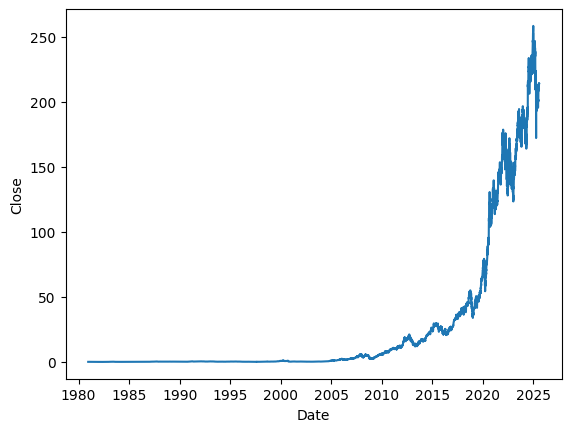

In [5]:
sns.lineplot(data = apple_story, x = 'Date', y = 'Close')

In [6]:
type(apple_story)

pandas.core.frame.DataFrame

## List interesting tickers: 

From finance.yahoo.com

- I guess i care about some commodities like oil, timber, copper, gold and silver. 
- Tech stocks I care aboute META, Facebook, Tesla, Google, OpenAI, Anthropic, and Microsoft, NVDA. 
- Mexican's I guess the IPC, and banking generals like Banorte, 
- SP500 and Some europe simmilar stock. 

* Plus some composite indexes like panic index like VIX. 

In [18]:
vix_ticker = yf.Ticker("^VIX")

In [19]:
#vix_his = vix_ticker.history(period = 'max')

from datetime import date
vix_his = vix_ticker.history(start = '2024-01-01', end = date.today().strftime("%Y-%m-%d"), interval = '1d')
vix_his.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-06:00,13.22,14.23,13.10,13.20,0,0.0,0.0
2024-01-03 00:00:00-06:00,13.35,14.22,13.33,14.04,0,0.0,0.0
2024-01-04 00:00:00-06:00,13.93,14.20,13.64,14.13,0,0.0,0.0
2024-01-05 00:00:00-06:00,14.24,14.58,13.29,13.35,0,0.0,0.0
2024-01-08 00:00:00-06:00,14.00,14.18,13.02,13.08,0,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

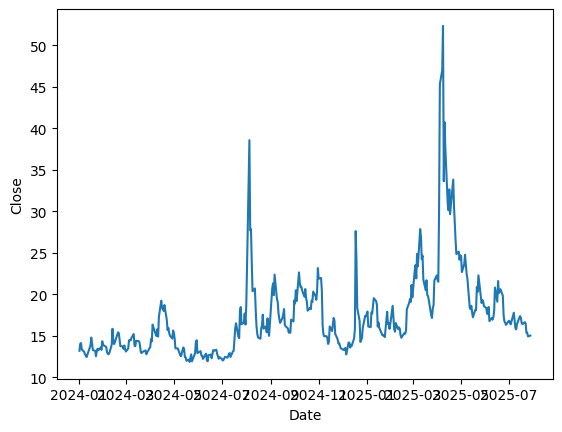

In [20]:
sns.lineplot(x = vix_his.index,y = vix_his['Close'])

In [14]:
pd.to_datetime('today').normalize()

Timestamp('2025-07-29 00:00:00')